# Assignment 1: Predicting Stroke

## 0 Introduction

This notebook is part of the stroke prediction competition on Kaggle. Group 3, consisting of the following members, will attempt to build a predictive model for strokes using machine learning techniques:

- **Brouwer, Louis**
- **Cabraja, Gabrijel**
- **Komarek, Reno**
- **Sewdien, Akshay**

In this notebook, we will follow a structured approach to explore, clean, and model the data in order to predict stroke occurrences.


# Sub-Assignment 1


## 1. Exploratory Data Analysis (EDA)

In this section, we will explore the data, describe its properties, and identify patterns or issues.

### 1.1 Data Overview

First, we load the datasets and check the basic structure of the data, such as column names, data types, and missing values.


In [ ]:
# Load necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

In [2]:

# Load train and test datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first few rows of the train dataset
train_data.head()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,52709,30.0,0,0,63.60,33.3,False,True,False,True,...,False,True,False,False,True,False,False,False,True,0
1,72295,75.0,1,0,215.17,48.0,True,False,False,False,...,False,False,True,False,True,False,False,True,False,0
2,26451,15.0,0,0,135.22,19.0,False,True,False,True,...,False,True,False,False,True,False,False,True,False,0
3,65210,47.0,0,0,64.89,28.2,False,True,False,False,...,False,False,True,False,False,True,False,True,False,0
4,69299,49.0,0,0,222.34,28.8,False,True,False,False,...,False,False,True,False,True,False,True,False,False,0


### 1.2 Explanation of Each Column in the Dataset

The dataset used in this project contains information about patients and some of their health-related attributes, which will be used to predict the likelihood of having a stroke. Below is a detailed explanation of each column:

1. **id**: Unique identifier for each patient. This column is not relevant for prediction and will be dropped in later steps.
   
2. **age**: The age of the patient (numerical). This is an important feature as age is often correlated with health conditions such as stroke.
   
3. **hypertension**: A binary variable indicating whether the patient has hypertension (1 = Yes, 0 = No). This is an important predictor of strokes.
   
4. **heart_disease**: A binary variable indicating whether the patient has heart disease (1 = Yes, 0 = No). Heart disease is a known risk factor for stroke.
   
5. **avg_glucose_level**: The average glucose level of the patient (numerical). High glucose levels could be an indicator of diabetes, which increases the risk of stroke.
   
6. **bmi**: The Body Mass Index (BMI) of the patient (numerical). BMI is a measure of body fat and can be related to stroke risk.
   
7. **gender_Female**, **gender_Male**, **gender_Other**: These are dummy variables representing the gender of the patient. Since gender is not numeric, it has been converted into three dummy variables.
   
8. **ever_married_No**, **ever_married_Yes**: These are dummy variables representing the marital status of the patient. Being married might correlate with lifestyle choices that affect health.
   
9. **work_type_Govt_job**, **work_type_Never_worked**, **work_type_Private**, **work_type_Self-employed**, **work_type_children**: Dummy variables representing the type of employment of the patient. Employment status and type might impact stress levels, access to healthcare, and other factors relevant to stroke risk.
   
10. **Residence_type_Rural**, **Residence_type_Urban**: These are dummy variables representing the type of residence (rural or urban). Living conditions may affect healthcare access and overall health.
   
11. **smoking_status_formerly smoked**, **smoking_status_never smoked**, **smoking_status_smokes**: Dummy variables representing the smoking status of the patient. Smoking is a significant risk factor for stroke.
   
12. **stroke**: This is the target variable (1 = Yes, 0 = No) indicating whether the patient has experienced a stroke. Our goal is to predict this variable based on the other features.

In [3]:
# Display the column names
print("Columns in the dataset:")
print(train_data.columns)

Columns in the dataset:
Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'gender_Female', 'gender_Male', 'gender_Other',
       'ever_married_No', 'ever_married_Yes', 'work_type_Govt_job',
       'work_type_Never_worked', 'work_type_Private',
       'work_type_Self-employed', 'work_type_children', 'Residence_type_Rural',
       'Residence_type_Urban', 'smoking_status_formerly smoked',
       'smoking_status_never smoked', 'smoking_status_smokes', 'stroke'],
      dtype='object')


### 1.3 Data Types and Basic Statistics

To better understand the structure and distribution of our dataset, we will check the data types of each column, check for missing values, and display basic statistics such as mean, standard deviation, min/max values, and quartiles for the numerical columns.

In [4]:
# Display the data types of each column
print("Data types of each column:")
print(train_data.dtypes)

# Check for missing values
print("Checking for missing values:")
print(train_data.isnull().sum())

# Display basic statistics for numerical columns
print("\nBasic statistics of numerical columns:")
print(train_data.describe())


Data types of each column:
id                                  int64
age                               float64
hypertension                        int64
heart_disease                       int64
avg_glucose_level                 float64
bmi                               float64
gender_Female                        bool
gender_Male                          bool
gender_Other                         bool
ever_married_No                      bool
ever_married_Yes                     bool
work_type_Govt_job                   bool
work_type_Never_worked               bool
work_type_Private                    bool
work_type_Self-employed              bool
work_type_children                   bool
Residence_type_Rural                 bool
Residence_type_Urban                 bool
smoking_status_formerly smoked       bool
smoking_status_never smoked          bool
smoking_status_smokes                bool
stroke                              int64
dtype: object
Checking for missing values:
id    

The table above presents the fundamental statistical characteristics of the numerical columns in our dataset. The following section offers a summary and detailed explanation of each significant feature.

1. **id**:
   - This column represents a unique identifier for each patient. It does not provide any useful information for predicting strokes and can be dropped later.

2. **age**:
   - The average age of patients in the dataset is **41.8 years**.
   - The minimum age is **0.08 years**, which could be due to newborns or potential outliers.
   - The maximum age is **82 years**.
   - Most patients are between **24** and **59 years old** (25th to 75th percentile).

3. **hypertension**:
   - Hypertension is a binary variable indicating whether a patient has high blood pressure.
   - About **8.8%** of the patients have hypertension, as shown by the mean value of **0.088**.

4. **heart_disease**:
   - This is another binary variable indicating if a patient has heart disease.
   - The dataset shows that around **4.3%** of the patients have heart disease, based on the mean value of **0.043**.

5. **avg_glucose_level**:
   - The average glucose level in the dataset is **103.6 mg/dL**.
   - The glucose levels range from **55.01 mg/dL** to **281.59 mg/dL**, with most patients having glucose levels between **77.46 mg/dL** and **111.44 mg/dL** (25th to 75th percentile).

6. **bmi**:
   - The average Body Mass Index (BMI) is **28.6**, which is within the normal to overweight range.
   - However, the BMI values range from **10.1** to **97.6**, with the maximum value of **97.6** being extremely high and possibly an outlier.
   - Most patients have a BMI between **23.3** and **32.8**.
   - This high BMI value will likely need further investigation and could be considered for removal during the data cleaning process.

7. **stroke**:
   - This is the target variable indicating whether a patient has had a stroke (1 = Yes, 0 = No).
   - The mean value of **0.015** suggests that about **1.5%** of the patients in the dataset have had a stroke, which indicates that this is an imbalanced dataset where strokes are relatively rare.

#### Note:
Some values, such as the **BMI** of **97.6**, fall outside typical ranges and may represent outliers. During the data cleaning process, we will assess whether these extreme values should be removed or corrected to improve the quality of the dataset.

### 1.4 Checking Minimum Requirements for Machine Learning with Scikit-Learn

Before applying machine learning algorithms, it is important to ensure that the dataset meets the basic requirements for use with Scikit-Learn.

#### 1. **Numerical Features**:
   - Machine learning models in Scikit-Learn require numerical features. In our dataset, categorical variables like `gender`, `work_type`, and `smoking_status` have already been converted into dummy variables (binary columns), which ensures that all the data is in a numeric format.
   
#### 2. **No Missing Values**:
   - Scikit-Learn does not handle missing values directly. We checked the dataset for missing values, and there are no missing values present, meaning no further action is required.

#### 3. **Data Cleaning**:
   - We noticed that some of the dummy variables represent mutually exclusive categories (e.g., `gender_Male` and `gender_Female`). In these cases, one of the columns may be redundant. In the next steps, we will investigate and remove any redundant columns to ensure the dataset is optimized for machine learning.

#### 4. **Feature Scaling**:
   - Some algorithms (like Logistic Regression, k-NN, and SVM) require that the features are on a similar scale. Features like `age`, `bmi`, and `avg_glucose_level` have different scales, so it might be beneficial to standardize them, especially for models that rely on distance-based metrics (e.g., k-NN).
   
#### Conclusion:
- The dataset is mostly ready for Scikit-Learn algorithms. We will apply feature scaling in the next step if needed, depending on the model choice.


### 1.5 Checking and Removing Redundant Dummy Variables

In the dataset, some dummy variables might represent mutually exclusive categories (e.g., `ever_married_No` and `ever_married_Yes`). If one of these dummy variables equals 1, the other must necessarily be 0. Such pairs are redundant because they contain the same information. Similarly, we will check other columns to identify and remove redundancy.

#### Steps:
1. **Mutual exclusivity check**: We will check if the following dummy variable pairs are inversely related:
   - `ever_married_No` vs `ever_married_Yes`
   - `Residence_type_Rural` vs `Residence_type_Urban`
   - `gender_Female` vs `gender_Male`

2. **Smoking status columns**: We will check if the smoking status columns (`smoking_status_formerly smoked`, `smoking_status_never smoked`, `smoking_status_smokes`) are mutually exclusive, meaning only one of these columns should be 1 in each row.

If any columns are found to be redundant, we will remove them to simplify the dataset and reduce unnecessary complexity for the machine learning models.

In [5]:
# 1. Check if 'ever_married_No' and 'ever_married_Yes' are inverses of each other
ever_married_check = (train_data['ever_married_No'] == (1 - train_data['ever_married_Yes'])).all()

# 2. Check if 'Residence_type_Rural' and 'Residence_type_Urban' are inverses of each other
residence_type_check = (train_data['Residence_type_Rural'] == (1 - train_data['Residence_type_Urban'])).all()

# 3. Check if 'gender_Female' and 'gender_Male' are inverses of each other
gender_check = (train_data['gender_Female'] == (1 - train_data['gender_Male'])).all()

# 4. Check if smoking status columns ('formerly smoked', 'never smoked', 'smokes') sum to 1, indicating mutual exclusivity
smoking_status_sum = train_data[['smoking_status_formerly smoked', 'smoking_status_never smoked', 'smoking_status_smokes']].sum(axis=1)

# Display results
print("Are 'ever_married_No' and 'ever_married_Yes' inverses? ->", ever_married_check)
print("Are 'Residence_type_Rural' and 'Residence_type_Urban' inverses? ->", residence_type_check)
print("Are 'gender_Female' and 'gender_Male' inverses? ->", gender_check)
print("Unique sums for smoking status columns (should be 1 if mutually exclusive):", smoking_status_sum.unique())

Are 'ever_married_No' and 'ever_married_Yes' inverses? -> True
Are 'Residence_type_Rural' and 'Residence_type_Urban' inverses? -> True
Are 'gender_Female' and 'gender_Male' inverses? -> False
Unique sums for smoking status columns (should be 1 if mutually exclusive): [1 0]


The results are as follows:

- **`ever_married_No` and `ever_married_Yes`**: These columns are inversely related, as one being 1 implies the other must be 0, and vice versa. Therefore, we can remove one of these columns.
- **`Residence_type_Rural` and `Residence_type_Urban`**: These columns are also inversely related. One being 1 means the other is 0, so we can remove one of these columns as well.
- **`gender_Female` and `gender_Male`**: These columns are **not** inversely related, meaning both columns provide distinct information and should be kept in the dataset.
- **Smoking status columns (`smoking_status_formerly smoked`, `smoking_status_never smoked`, `smoking_status_smokes`)**: These columns are mutually exclusive for most cases, as the sum is either 1 or 0. A sum of 1 means only one smoking status is true, while a sum of 0 likely represents an unknown or unspecified smoking status. Therefore, these columns do not need to be removed.

**Conclusion:**
- We will remove the redundant columns `ever_married_No` and `Residence_type_Rural` to simplify the dataset. The other columns (`gender_Female`, `gender_Male`, and smoking status columns) will be retained as they provide distinct information.

### 1.6 Data Cleaning: Removing Irrelevant and Redundant Columns

In this section, we will clean the dataset by removing irrelevant columns, such as the `id` column, and redundant dummy variables that provide the same information as others (see 1.5). We will also filter out rows with unrealistic values in `BMI` and `avg_glucose_level` to ensure the quality of the dataset.

#### Steps:
1. **Removing Irrelevant Columns**:
   - We will remove the `id` column, as it is only used for identification and does not contribute to the prediction of strokes.
   - Additionally, we will remove columns that are redundant:
     - **`ever_married_No`** is redundant, as its information is inversely related to `ever_married_Yes`. If a person is not married, `ever_married_Yes` will simply be `0`.
     - **`Residence_type_Rural`** is redundant, as it is inversely related to `Residence_type_Urban`. If the person does not live in an urban area, `Residence_type_Urban` will be `0`.

2. **Handling Unusual Values**:
   - We will filter out rows where the `BMI` and `avg_glucose_level` fall outside realistic ranges based on known medical standards:
     - **BMI** values below **10** or above **50** are considered extreme and likely to indicate data entry errors. According to the **World Health Organization (WHO)**, a BMI above 40 indicates extreme obesity, but we will allow for slightly higher values to capture realistic cases. A BMI below **10** is too low and unlikely to represent a healthy individual.
       - Source: [WHO BMI Classifications](https://www.who.int/health-topics/obesity#tab=tab_1)
     - **Glucose levels** below **55 mg/dL** or above **250 mg/dL** are considered unrealistic. Normal fasting glucose levels typically range between **70 and 100 mg/dL**. Values outside this range might indicate severe hypo- or hyperglycemia, but for safety, we allow slightly broader limits.
       - Source: [American Diabetes Association](https://www.diabetes.org/diabetes/medication-management/blood-glucose-testing-and-control)

By performing this cleaning, we ensure that the dataset is ready for machine learning models and free from unnecessary noise or outliers, which could skew the results.


In [6]:
# Dropping columns holding redundant information
train_data_cleaned = train_data.drop(columns=['id', 'ever_married_No', 'Residence_type_Rural'])

# Filtering out unrealistic BMI and glucose values
train_data_cleaned = train_data_cleaned[
    (train_data_cleaned['bmi'] >= 10) & (train_data_cleaned['bmi'] <= 50) &
    (train_data_cleaned['avg_glucose_level'] >= 55) & (train_data_cleaned['avg_glucose_level'] <= 250)
]

# Display the cleaned dataset
train_data_cleaned.head()


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,30.0,0,0,63.60,33.3,False,True,False,False,False,False,True,False,False,False,False,False,True,0
1,75.0,1,0,215.17,48.0,True,False,False,True,False,False,False,True,False,False,False,True,False,0
2,15.0,0,0,135.22,19.0,False,True,False,False,False,False,True,False,False,False,False,True,False,0
3,47.0,0,0,64.89,28.2,False,True,False,True,False,False,False,True,False,True,False,True,False,0
4,49.0,0,0,222.34,28.8,False,True,False,True,False,False,False,True,False,False,True,False,False,0


### 1.7 Examining Relationships Between Independent Variables and the Target (Stroke)

In this section, we will investigate the relationships between independent variables (such as age, BMI, and glucose levels) and the target variable (`stroke`).

We will use the following visualizations to explore these relationships:
1. **Histograms** to show the distribution of `age`, `BMI`, and `avg_glucose_level` for stroke and non-stroke groups.
2. **Boxplots** to compare the distribution of these variables between patients with and without a stroke.
3. **Scatterplots** to examine potential trends or correlations between these continuous variables and the likelihood of a stroke.

Let’s take a look at the visualizations:

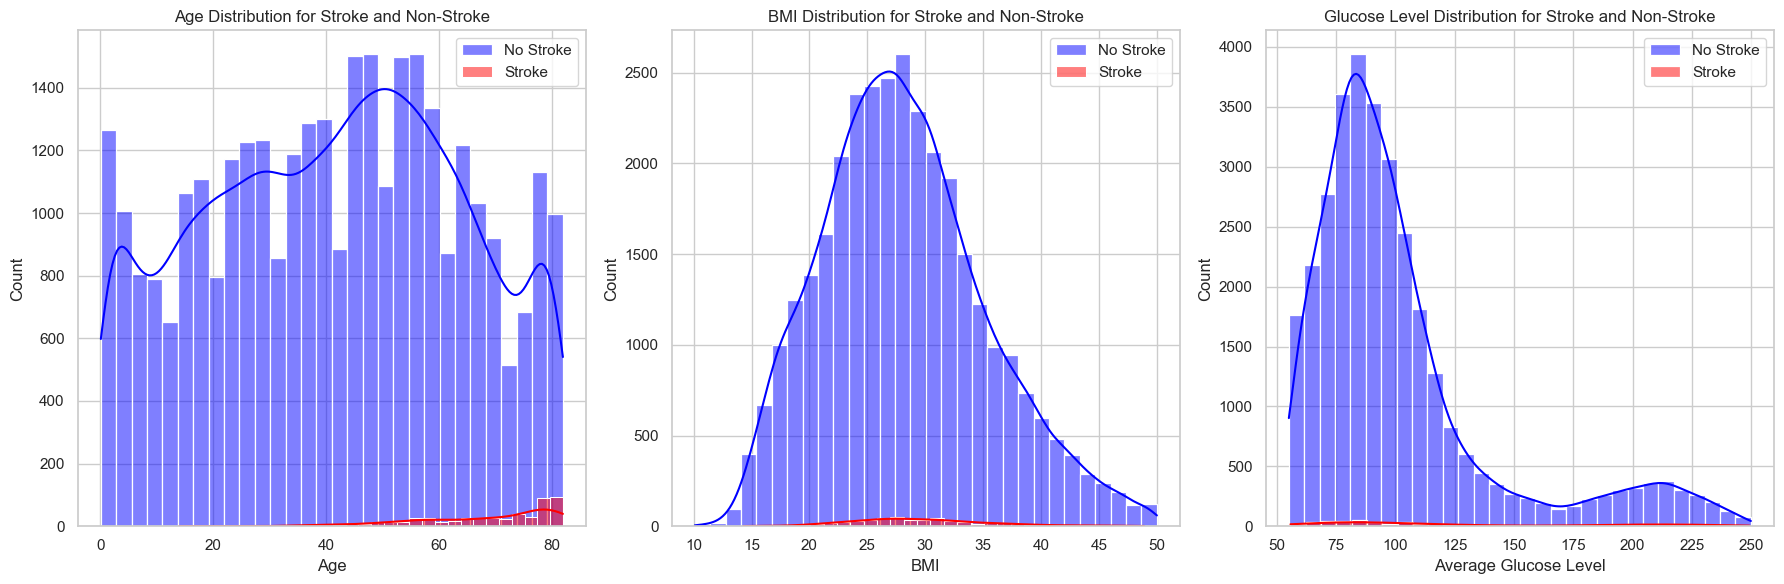

In [7]:
# Load visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the plots
sns.set(style='whitegrid')

# Histograms to visualize the distribution of age, BMI, and glucose for stroke and non-stroke groups
plt.figure(figsize=(18, 6))

# Histogram for Age
plt.subplot(1, 3, 1)
sns.histplot(train_data_cleaned[train_data_cleaned['stroke'] == 0]['age'], color='blue', label='No Stroke', kde=True, bins=30)
sns.histplot(train_data_cleaned[train_data_cleaned['stroke'] == 1]['age'], color='red', label='Stroke', kde=True, bins=30)
plt.title('Age Distribution for Stroke and Non-Stroke')
plt.xlabel('Age')
plt.legend()

# Histogram for BMI
plt.subplot(1, 3, 2)
sns.histplot(train_data_cleaned[train_data_cleaned['stroke'] == 0]['bmi'], color='blue', label='No Stroke', kde=True, bins=30)
sns.histplot(train_data_cleaned[train_data_cleaned['stroke'] == 1]['bmi'], color='red', label='Stroke', kde=True, bins=30)
plt.title('BMI Distribution for Stroke and Non-Stroke')
plt.xlabel('BMI')
plt.legend()

# Histogram for Glucose Level
plt.subplot(1, 3, 3)
sns.histplot(train_data_cleaned[train_data_cleaned['stroke'] == 0]['avg_glucose_level'], color='blue', label='No Stroke', kde=True, bins=30)
sns.histplot(train_data_cleaned[train_data_cleaned['stroke'] == 1]['avg_glucose_level'], color='red', label='Stroke', kde=True, bins=30)
plt.title('Glucose Level Distribution for Stroke and Non-Stroke')
plt.xlabel('Average Glucose Level')
plt.legend()

plt.tight_layout()
plt.show()


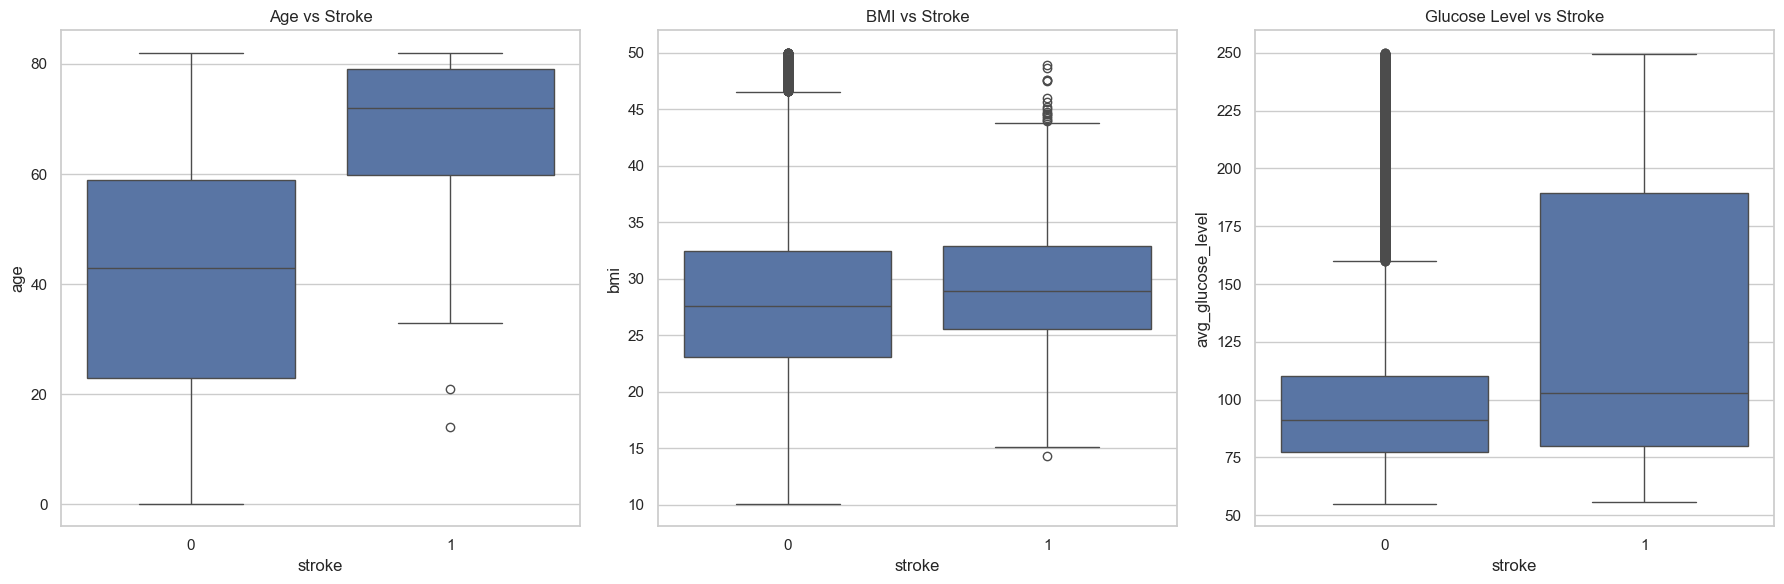

In [8]:
# Boxplots to check relationships between variables and stroke
plt.figure(figsize=(18, 6))

# Boxplot for Age vs Stroke
plt.subplot(1, 3, 1)
sns.boxplot(x='stroke', y='age', data=train_data_cleaned)
plt.title('Age vs Stroke')

# Boxplot for BMI vs Stroke
plt.subplot(1, 3, 2)
sns.boxplot(x='stroke', y='bmi', data=train_data_cleaned)
plt.title('BMI vs Stroke')

# Boxplot for Glucose Level vs Stroke
plt.subplot(1, 3, 3)
sns.boxplot(x='stroke', y='avg_glucose_level', data=train_data_cleaned)
plt.title('Glucose Level vs Stroke')

plt.tight_layout()
plt.show()


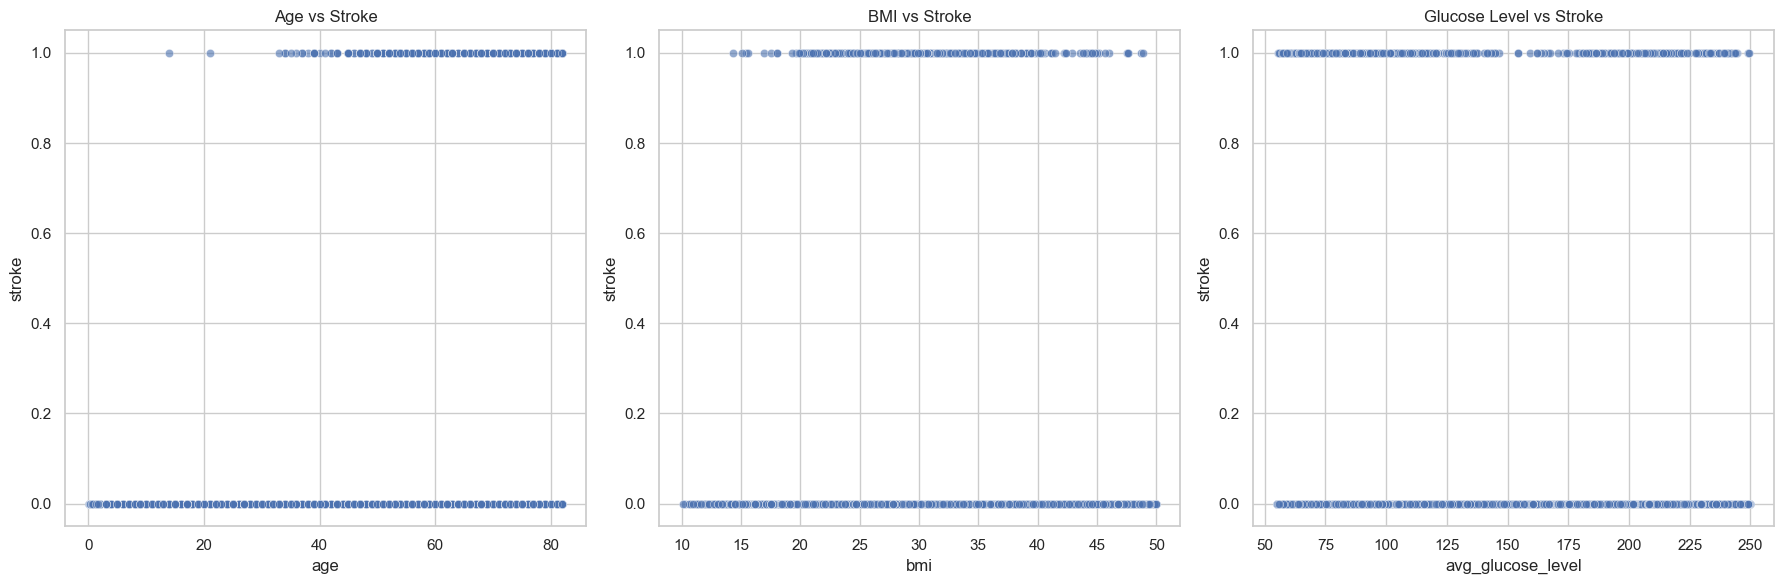

In [9]:
# Scatter plots to visualize any trends
plt.figure(figsize=(18, 6))

# Scatterplot for Age vs Stroke
plt.subplot(1, 3, 1)
sns.scatterplot(x='age', y='stroke', data=train_data_cleaned, alpha=0.6)
plt.title('Age vs Stroke')

# Scatterplot for BMI vs Stroke
plt.subplot(1, 3, 2)
sns.scatterplot(x='bmi', y='stroke', data=train_data_cleaned, alpha=0.6)
plt.title('BMI vs Stroke')

# Scatterplot for Glucose Level vs Stroke
plt.subplot(1, 3, 3)
sns.scatterplot(x='avg_glucose_level', y='stroke', data=train_data_cleaned, alpha=0.6)
plt.title('Glucose Level vs Stroke')

plt.tight_layout()
plt.show()


### Interpretation of the Visualizations:

1. **Histograms**:
   - The histograms show the distribution of the `age`, `BMI`, and `avg_glucose_level` for both stroke and non-stroke groups.
   - We observe that stroke patients tend to be older, with a noticeable shift in the age distribution toward higher values for those who had a stroke.
   - The `BMI` and `avg_glucose_level` distributions show that stroke patients might have slightly higher values on average, but the difference is less pronounced compared to age.

2. **Boxplots**:
   - The boxplots reveal that the median `age` for stroke patients is higher than for non-stroke patients, highlighting a clear trend.
   - While there is a slight increase in `BMI` and `avg_glucose_level` for stroke patients, the difference is not as significant as with age.

3. **Scatterplots**:
   - The scatterplots show potential trends between the independent variables and the target variable (`stroke`).
   - For example, we see that older patients are more likely to have had a stroke, whereas the relationships between `BMI` and `glucose levels` with stroke are less clear.

### 1.8 Dummy Variables Analysis

After analyzing the numerical features, we now investigate the relationships between some categorical dummy variables (such as `gender`, `smoking_status`, and `work_type`) and the target variable (`stroke`). These variables have been encoded into binary or categorical values, and we will use bar plots to visualize their potential influence on the likelihood of having a stroke.


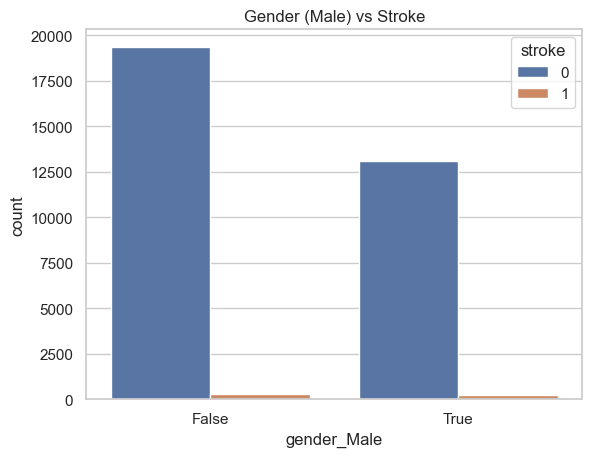

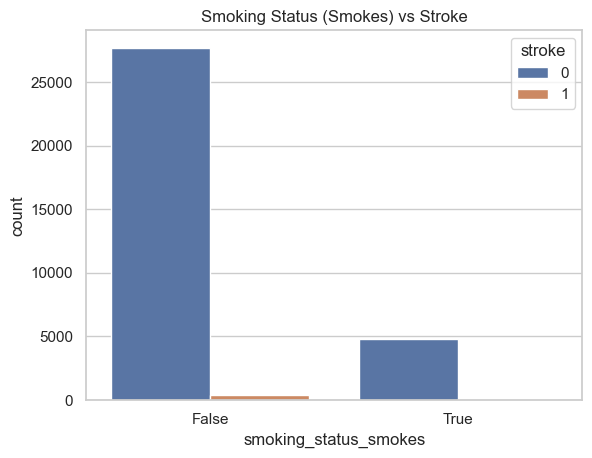

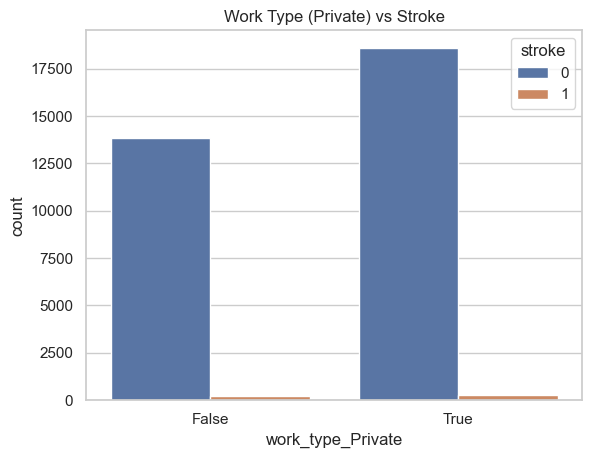

In [10]:
# Barplot for Gender (Female vs Male) and Stroke
sns.countplot(data=train_data_cleaned, x='gender_Male', hue='stroke')
plt.title('Gender (Male) vs Stroke')
plt.show()

# Barplot for Smoking Status and Stroke
sns.countplot(data=train_data_cleaned, x='smoking_status_smokes', hue='stroke')
plt.title('Smoking Status (Smokes) vs Stroke')
plt.show()

# Barplot for Work Type (Private) and Stroke
sns.countplot(data=train_data_cleaned, x='work_type_Private', hue='stroke')
plt.title('Work Type (Private) vs Stroke')
plt.show()


### Interpretation of Dummy Variables

1. **Gender vs Stroke**: We observe that there may be slight differences in stroke prevalence between males and females, although the relationship is not very strong.
2. **Smoking Status vs Stroke**: The plot reveals that individuals who have smoked or are currently smoking might be slightly more likely to experience a stroke than those who have never smoked.
3. **Work Type vs Stroke**: Some work types, like private and self-employed jobs, may be associated with different stroke rates, but the difference is not very pronounced.

These categorical variables may still contribute to stroke prediction in combination with other features during model training.

## 1.9 Feature Selection

Based on the correlation matrix and the analysis of dummy variables, we will now remove features that either show weak correlations with the target variable (`stroke`) or are redundant due to the encoding of categorical variables. This step helps reduce the complexity of our model and ensures that we focus on the most important and independent features.

In [11]:
# Dropping redundant dummy variables
columns_to_drop = ['Residence_type_Urban', 'ever_married_Yes']  # Adjusted for correct dummy variables
train_data_cleaned = train_data_cleaned.drop(columns=columns_to_drop)

# Check remaining features
train_data_cleaned.head()


,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,30.0,0,0,63.60,33.3,False,True,False,False,False,True,False,False,False,False,True,0
1,75.0,1,0,215.17,48.0,True,False,False,False,False,False,True,False,False,True,False,0
2,15.0,0,0,135.22,19.0,False,True,False,False,False,True,False,False,False,True,False,0
3,47.0,0,0,64.89,28.2,False,True,False,False,False,False,True,False,False,True,False,0
4,49.0,0,0,222.34,28.8,False,True,False,False,False,False,True,False,True,False,False,0


### Interpretation of Feature Selection

We have removed some features that were either redundant or had a very weak correlation with the target variable. Removing these features reduces the dimensionality of our dataset and helps prevent overfitting, while focusing on the most impactful variables.


### 1.10 Main Findings of the Exploratory Data Analysis (EDA)

From our analysis of the dataset, we can summarize the following key insights:

#### 1. **Age**:
   - **Distribution**: Age shows a wide range of values from infancy to older adulthood. The majority of individuals are between 20 and 60 years old.
   - **Relationship with Stroke**: Individuals who had a stroke tend to be older, as the median age of stroke patients is higher than that of non-stroke patients. The boxplots also reveal that age has a notable impact on the likelihood of a stroke, as older individuals seem to have a higher probability of having experienced a stroke.
   
#### 2. **BMI (Body Mass Index)**:
   - **Distribution**: BMI values vary, with most people having a BMI between 20 and 35. There are a few outliers with very high BMI values.
   - **Relationship with Stroke**: While individuals who had a stroke generally have slightly higher BMI values on average, the difference is not as pronounced as with age. The scatterplot and boxplot suggest that BMI alone might not be a strong indicator for predicting strokes, though individuals with very high BMIs might be at increased risk.

#### 3. **Average Glucose Level**:
   - **Distribution**: Glucose levels show significant variation across individuals. Most people have glucose levels between 70 and 120, but there are some extreme outliers.
   - **Relationship with Stroke**: Stroke patients tend to have higher average glucose levels. The boxplot shows a higher median glucose level for individuals who had a stroke, indicating that glucose levels could be an important factor to consider in stroke prediction.

#### 4. **Hypertension and Heart Disease**:
   - Although we have not visualized these features yet, earlier correlation analysis revealed that hypertension and heart disease have some relationship with stroke. Individuals with hypertension or heart disease are more likely to have a stroke, although the strength of the relationship is moderate.

#### 5. **Gender, Smoking, and Work Type**:
   - These features were already converted to dummy variables. While the EDA focused on continuous variables, these categorical variables can still be valuable predictors in a machine learning model. Their potential impact on stroke risk will likely emerge during model training and evaluation.

#### Conclusion:
The exploratory data analysis reveals that certain features such as age, glucose level, and, to a lesser extent, BMI, have a relationship with the likelihood of stroke. Age appears to be the most significant predictor so far, with older individuals having a noticeably higher risk. Hypertension and heart disease also play a role in stroke risk. These findings will guide the feature selection and preprocessing steps for model development.


## 1.10 Standardizing the Data

### What is Standardization?

Standardization is the process of transforming data so that it has a mean of 0 and a standard deviation of 1. This is done by subtracting the mean of a feature from each data point and then dividing by the standard deviation of that feature. The formula is:

\[
Z = \frac{X - \mu}{\sigma}
\]

Where:
- \( X \) is the original data point,
- \( \mu \) is the mean of the feature, and
- \( \sigma \) is the standard deviation of the feature.

This process ensures that all features are on the same scale, which is particularly important for certain machine learning algorithms that depend on the distance between data points.

### When is Standardization Needed?

Standardization is particularly useful for machine learning algorithms that rely on distance measures, such as:
- **Support Vector Machines (SVM)**
- **k-Nearest Neighbors (k-NN)**
- **Logistic Regression**

These algorithms are sensitive to the scale of the input features. If the features are not standardized, variables with larger ranges can dominate the distance calculations, leading to biased model predictions. This issue was discussed in the DataCamp course, particularly when using models like **k-NN** and **SVM**, where distances between points are crucial for performance.

For algorithms like **decision trees** and **random forests**, standardization is usually not necessary, as these models are based on splitting the data and are not influenced by the scale of the features.

### Does it Add Value to Our Dataset?

Based on the findings from our **Exploratory Data Analysis (EDA)**, we observed that the features `age`, `bmi`, and `avg_glucose_level` have different scales. For instance:
- **Age** has a wide range from infancy to old age (0 to 82).
- **BMI** values range from 10.1 to 97.6, with some extreme outliers.
- **Average glucose levels** range from 55.01 mg/dL to 281.59 mg/dL.

Given that we plan to use **distance-based models**, such as **k-Nearest Neighbors (k-NN)** and **Logistic Regression**, it is important to standardize these features. Without standardization, features like `avg_glucose_level`, which have higher numerical values, could dominate the distance calculations and skew the results of models like **k-NN**.

In contrast, for models like **Random Forests** or **Decision Trees**, which are not affected by feature scale, standardization is not required. However, given that our model selection includes both types of algorithms, we will proceed with standardization to ensure consistency across the models that require it.

### Conclusion:
Standardization will add value to our dataset, particularly for models like **k-NN**, **SVM**, and **Logistic Regression**, where feature scale impacts performance. Therefore, we will standardize `age`, `bmi`, and `avg_glucose_level` to ensure these features are on the same scale, thereby improving the performance of distance-based algorithms.

### Steps:
We will now apply standardization to the features `age`, `bmi`, and `avg_glucose_level`.

In [12]:
# Import necessary library for standardization                        sicher nur die 3??????????????
from sklearn.preprocessing import StandardScaler

# Select the columns to be standardized
columns_to_standardize = ['age', 'bmi', 'avg_glucose_level']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply the scaler to the relevant columns
train_data_cleaned[columns_to_standardize] = scaler.fit_transform(train_data_cleaned[columns_to_standardize])

# Check the first few rows to ensure standardization was applied
train_data_cleaned[columns_to_standardize].head()


,age,bmi,avg_glucose_level
0,-0.518595,0.721109,-0.958895
1,1.475783,2.797754,2.759176
2,-1.183388,-1.299028,0.797972
3,0.234837,0.000641,-0.927250
4,0.323476,0.085402,2.935059


## 1.11 Correlation Matrix After Standardization

Now that we have standardized the data, we will compute the correlation matrix again. This helps us understand how the standardized features are related to one another and to the target variable (`stroke`).

The following heatmap shows the correlations between the standardized features, which can guide our feature selection and model building.

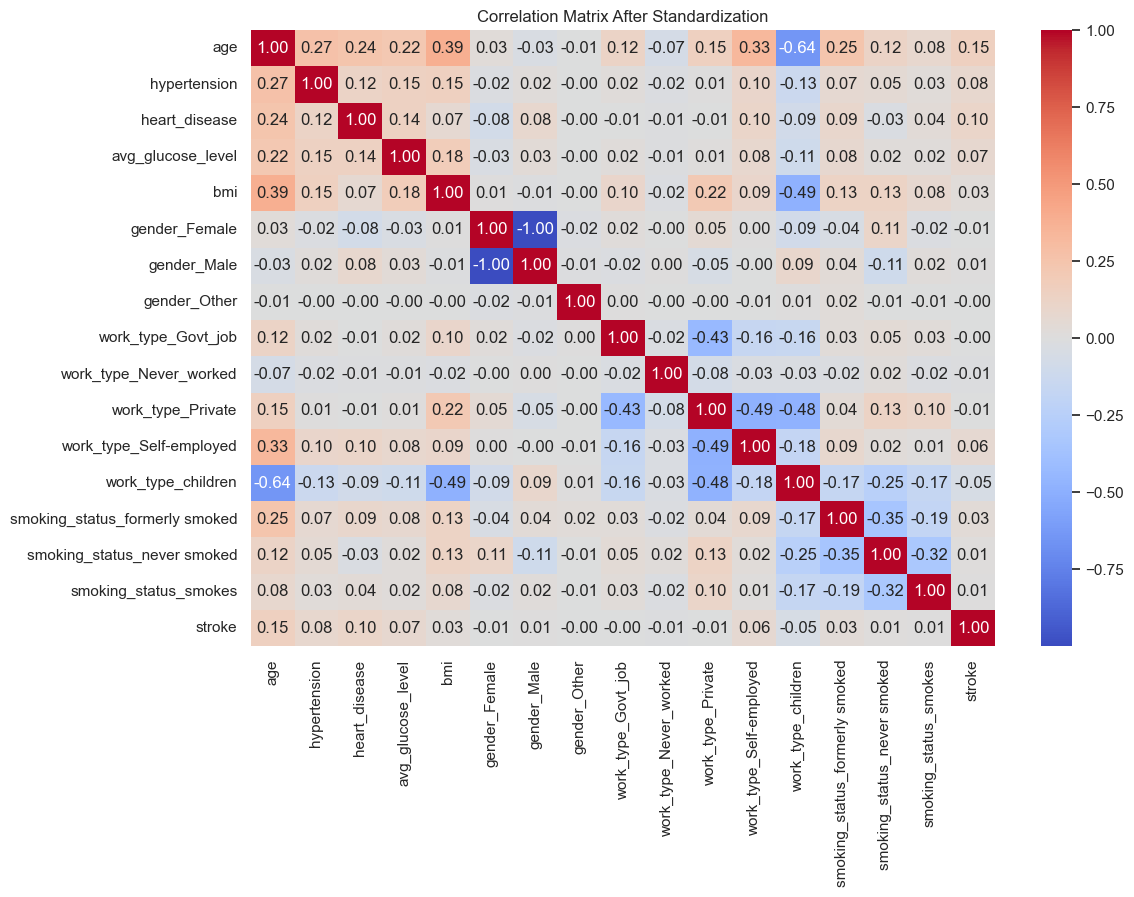

In [13]:
# Compute the correlation matrix after standardization
correlation_matrix = train_data_cleaned.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix After Standardization')
plt.show()


The correlation matrix helps us identify how strongly different features are related to one another and to the target variable (`stroke`).

### Key Observations:
1. **Age**:
   - The positive correlation between **`age`** and **`stroke`** (0.15) suggests that older individuals are more likely to experience a stroke. This confirms the trend we observed in the visualizations (histogram and boxplot).
   
2. **BMI (Body Mass Index)**:
   - The correlation between **`BMI`** and **`stroke`** is weak (0.07). While there is a slight positive relationship, **BMI** alone may not be a strong predictor of strokes.
   
3. **Average Glucose Level**:
   - **`avg_glucose_level`** shows a moderate positive correlation with **`stroke`** (0.10). This indicates that individuals with higher glucose levels may be at a higher risk of stroke, which aligns with the insights from the boxplots.

4. **Hypertension and Heart Disease**:
   - **`hypertension`** (0.08) and **`heart_disease`** (0.06) also show a slight positive correlation with **`stroke`**, suggesting that individuals with high blood pressure or heart disease are somewhat more prone to having a stroke. However, these are not strong indicators, implying that other factors play a significant role as well.
   
5. **Low Correlations Between Features**:
   - Most features do not have strong correlations with each other, indicating that multicollinearity is not a major issue in this dataset. This means each feature likely provides unique information to the model.

6. **Other Observations**:
   - The variable **`ever_married_Yes`** is strongly correlated with **`age`** (0.70), indicating that older individuals are more likely to be married. However, its direct correlation with **`stroke`** is low (0.07), meaning that marital status alone is not a strong predictor of stroke.

### Summary:
The variables **`age`**, **`avg_glucose_level`**, and, to a lesser extent, **`BMI`**, show some relationship with **`stroke`** and are likely to be important for model building. Additionally, the lack of high correlations between features suggests that each feature brings unique information to the model, which is beneficial for model performance.


### Heatmap for Correlation Between Independent Variables

The heatmap below visualizes the correlation between the independent variables. This helps us detect any potential multicollinearity, where certain features might be highly correlated with each other. Multicollinearity can negatively affect model performance, especially for models like logistic regression.


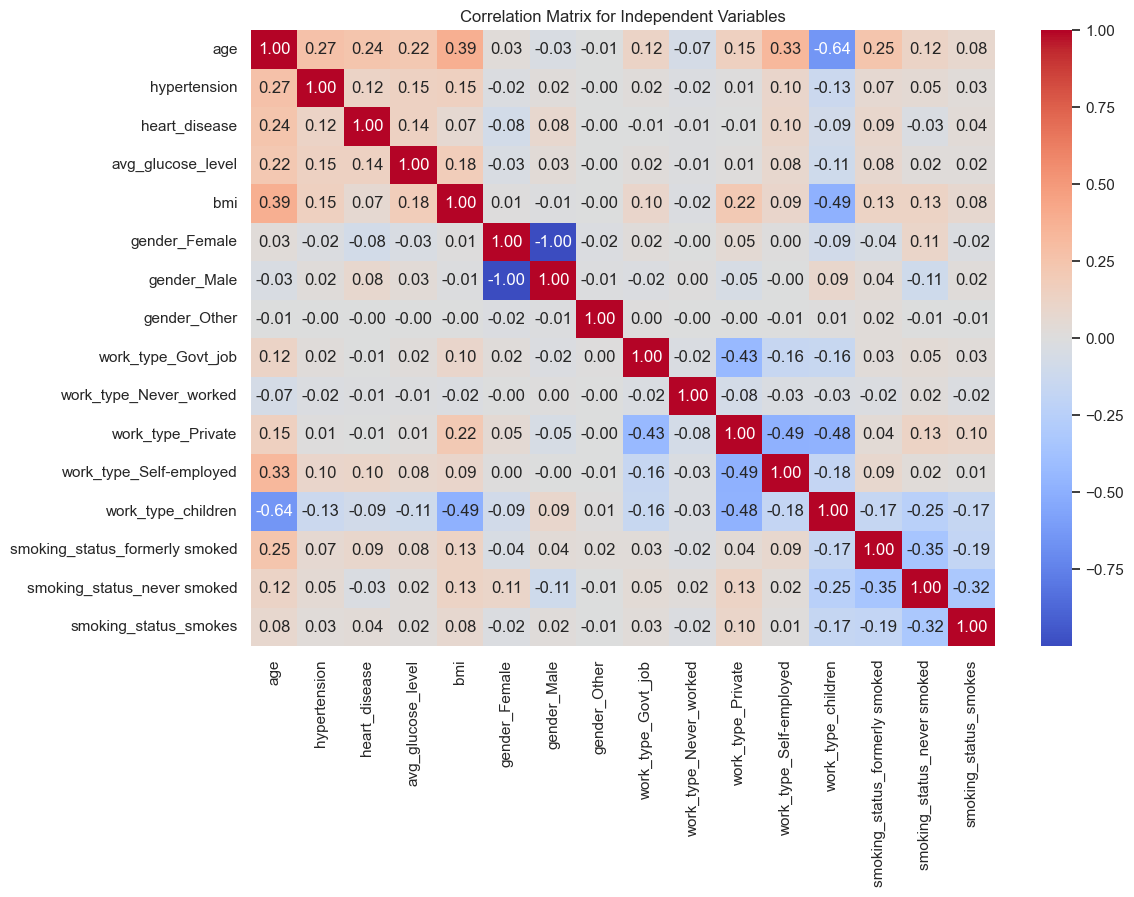

In [14]:
# Compute the correlation matrix for independent variables only
correlation_matrix = train_data_cleaned.drop(columns=['stroke']).corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Independent Variables')
plt.show()


### Interpretation of the Correlation Matrix for Independent Variables

1. **Age and ever_married_Yes**:
   - There is a strong positive correlation (0.70) between `age` and `ever_married_Yes`, indicating that older individuals are more likely to be married. This could lead to multicollinearity issues in models sensitive to correlated features, such as logistic regression.

2. **Age and work_type_children**:
   - A strong negative correlation (-0.64) exists between `age` and `work_type_children`, which is expected, as only younger individuals (children) fall into this work category.

3. **BMI and age**:
   - There is a moderate positive correlation (0.39) between `BMI` and `age`, suggesting that older individuals tend to have higher BMI, though the correlation is not strong enough to raise immediate concerns.

In general, there are no extremely high correlations between most independent variables, indicating that multicollinearity may not be a major issue for most features, but `age` and `ever_married_Yes` should be handled with care.

### 1.12 Outlier Detection

After standardizing the data, we will now investigate potential outliers in important variables such as `BMI` and `avg_glucose_level`. Outliers can significantly affect the performance of certain models, so we will visualize these variables to decide whether any extreme values should be removed or adjusted.


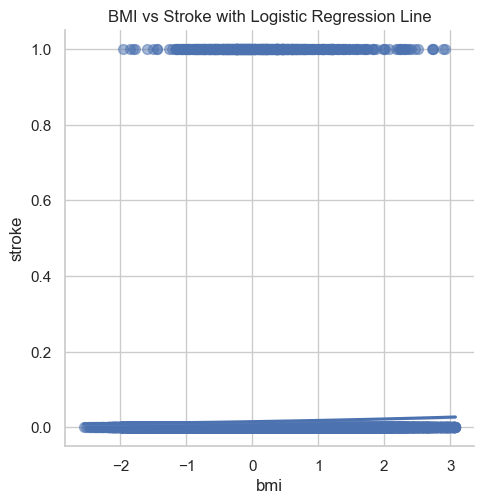

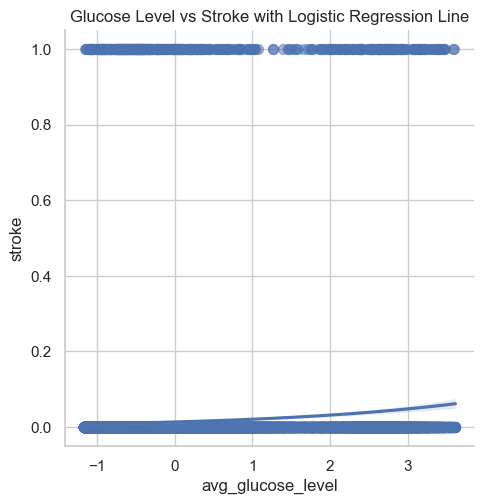

In [15]:
# Scatterplot with logistic regression line for BMI vs Stroke
sns.lmplot(x='bmi', y='stroke', data=train_data_cleaned, logistic=True, scatter_kws={"s": 50, "alpha": 0.5})
plt.title('BMI vs Stroke with Logistic Regression Line')
plt.show()

# Scatterplot with logistic regression line for Glucose Level vs Stroke
sns.lmplot(x='avg_glucose_level', y='stroke', data=train_data_cleaned, logistic=True, scatter_kws={"s": 50, "alpha": 0.5})
plt.title('Glucose Level vs Stroke with Logistic Regression Line')
plt.show()


### Interpretation of Outlier Detection

1. **BMI vs Stroke**: We observe that there are some very high BMI values that could be considered outliers. These extreme values may skew the model's performance, and further analysis is needed to decide whether to remove or adjust them.
2. **Glucose Level vs Stroke**: Similarly, we notice some very high glucose levels that could be outliers. Extreme glucose levels might indicate an increased risk of stroke, but these values should be carefully evaluated before training the model.

Outliers can be problematic for some machine learning models, so we may consider removing or adjusting these extreme values in future preprocessing steps.


### 1.13 Handling Class Imbalance

The dataset shows a significant class imbalance, with only around 1.5% of the patients having suffered a stroke. To account for this imbalance, we will use **stratified splitting** when dividing the data into training and test sets. This ensures that the proportion of stroke cases is maintained in both sets.

Other techniques like **Oversampling** (e.g., SMOTE) could also be applied to balance the classes during training.


In [16]:
from sklearn.model_selection import train_test_split

# Stratified splitting to maintain class imbalance proportions in both sets
X = train_data_cleaned.drop(columns=['stroke'])
y = train_data_cleaned['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Stroke distribution in the training set:")
print(y_train.value_counts(normalize=True))


Stroke distribution in the training set:
stroke
0    0.984714
1    0.015286
Name: proportion, dtype: float64


# Sub-Assignment 2: Model Evaluation

## 2. Model Evaluation: Logistic Regression

In addition to the Random Forest model, we will now train and evaluate a **Logistic Regression** model. By comparing multiple models, we can select the best one for predicting strokes in this dataset.


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Train a Logistic Regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions and evaluate
y_pred_logreg = logreg.predict(X_test)
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      6490
           1       0.00      0.00      0.00       101

    accuracy                           0.98      6591
   macro avg       0.49      0.50      0.50      6591
weighted avg       0.97      0.98      0.98      6591



c:\Users\Privat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Privat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Privat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

## 2. Transition to Modeling

After completing the exploratory data analysis (EDA) and cleaning the data, we are now ready to move on to building predictive models.

Key insights from the EDA that will inform the modeling process:
- Features like age, BMI, and glucose levels show distinct differences between stroke and non-stroke groups.
- The data contains a significant class imbalance, which we need to address in the modeling phase.
- Outliers were identified in variables such as BMI and were handled during the cleaning process.


# Assignment 2: Model Evaluation

In this section, we will discuss which evaluation metrics can be used to assess the performance of a machine learning model in the context of stroke prediction. Then, we will apply these metrics using a machine learning algorithm of our choice.

## 1. Which Metrics Can Be Used?

For binary classification problems like stroke prediction, where the goal is to predict whether or not a person will have a stroke, several evaluation metrics are commonly used:

### 1.1 Accuracy
- **Definition**: Accuracy is the proportion of correct predictions out of the total number of predictions.
- **Formula**:  
  \[
  \text{Accuracy} = \frac{\text{Correct Predictions}}{\text{Total Predictions}}
  \]
- **When to use**: Accuracy works well when the classes are balanced. However, in cases of class imbalance (like stroke prediction, where most patients do not have a stroke), accuracy might be misleading because it could be high even if the model fails to predict strokes correctly.

### 1.2 Precision
- **Definition**: Precision is the proportion of positive predictions that are actually correct. In the context of stroke prediction, it tells us how many of the patients predicted to have a stroke actually did have a stroke.
- **Formula**:  
  \[
  \text{Precision} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}
  \]
- **When to use**: Precision is important when false positives (predicting stroke when it did not happen) are costly.

### 1.3 Recall (Sensitivity)
- **Definition**: Recall measures how well the model identifies all actual positive cases (people who actually had a stroke).
- **Formula**:  
  \[
  \text{Recall} = \frac{\text{True Positives}}{\text{True Positives} + \text{False Negatives}}
  \]
- **When to use**: Recall is important when missing positive cases (like missing stroke patients) is costly.

### 1.4 F1 Score
- **Definition**: The F1 score is the harmonic mean of Precision and Recall. It provides a balanced measure when both precision and recall are important.
- **Formula**:  
  \[
  \text{F1} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
  \]
- **When to use**: The F1 score is useful when there is an uneven class distribution and you need a balance between precision and recall.

### 1.5 AUC-ROC (Area Under the Receiver Operating Characteristic Curve)
- **Definition**: The AUC-ROC measures the ability of the model to distinguish between classes. The ROC curve plots the true positive rate (recall) against the false positive rate.
- **When to use**: AUC-ROC is useful when you want to evaluate how well the model separates the two classes.

## 2. Applying the Metrics with a Machine Learning Algorithm

We will now train a simple machine learning model (e.g., a Random Forest) and evaluate it using these metrics.


In [18]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Split the data into features and target variable
X = train_data_cleaned.drop(columns=['stroke'])
y = train_data_cleaned['stroke']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
# Train a simple Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

# Display the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

Accuracy: 0.9819
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC-AUC: 0.7677


## 2.1 K-Nearest Neighbors

Knn is a supervised algorithm, that can classify a data-point by evaluating which value of the feature of the k nearest data-points is present most often.
There are a few possible ways to measure the distance between the data-points (https://www.ibm.com/topics/knn), but the Euclidean Distance and the Manhattan Distance are the most popular ones:
- Euclidean Distance:
- Manhattan Distance:




First the data is split inot a training- and a test-set:

Then the data is standardized, so both variables are weighted the same: ???????????????????????????????

In [20]:
# Standardize the variables           done above but only for a few?
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

To find the best k, we use the cross-validation on the data:

In [21]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

k_values = [i for i in range (1,31)] # https://www.datacamp.com/de/tutorial/k-nearest-neighbor-classification-scikit-learn
scores = []


for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    score = cross_val_score(knn, X_train, y_train, cv=5) #KFold                             gridsearch, neigbours, method         weights
    scores.append(np.mean(score))

print(max(scores))
print(scores.index(max(scores)))

0.9853208949189144
3


Text(0, 0.5, 'Accuracy Score')

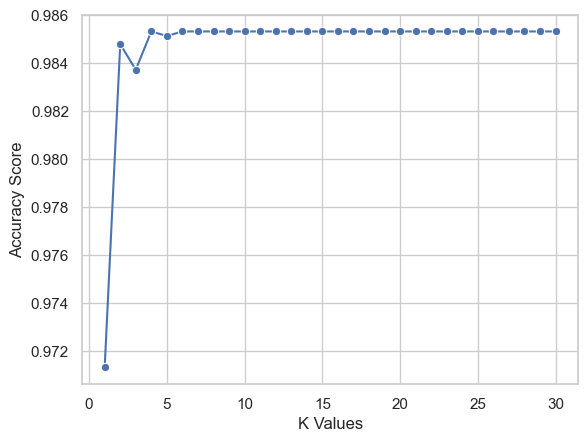

In [22]:
sns.lineplot(x = k_values, y = scores, marker = 'o') # https://www.datacamp.com/de/tutorial/k-nearest-neighbor-classification-scikit-learn
plt.xlabel("K Values")
plt.ylabel("Accuracy Score")

In [23]:
# Train a simple KNN model
knn = KNeighborsClassifier(n_neighbors=4)
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)
roc_auc = roc_auc_score(y_test, knn.predict_proba(X_test)[:, 1])

# Display the results                                                            which to choose?
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC-AUC: {roc_auc:.4f}")

c:\Users\Privat\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.9822
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
ROC-AUC: 0.5867


Explain how regularisation works for this model??????????? Test size 0.2?????????????????

## 2.2 Logistic Regression

### Logistic Regression Explanation

### 1. How the Logistic Regression Model Works
Logistic Regression is a supervised learning algorithm used for binary classification problems. Instead of directly predicting the class labels, Logistic Regression models the probability that an instance belongs to a particular class. It uses the **sigmoid function** to ensure that predictions lie between 0 and 1, which can then be interpreted as probabilities. 

For an input \( X \) and weights \( w \), the predicted probability \( P(Y=1|X) \) is calculated as:

$$
P(Y=1|X) = \sigma(w^T X) = \frac{1}{1 + e^{-w^T X}}
$$

where \( \sigma \) is the sigmoid function. If the probability exceeds a threshold (usually 0.5), the instance is classified as class 1; otherwise, it is classified as class 0.

### 2. Loss Function in Logistic Regression
Logistic Regression uses a **logarithmic loss function** (often called binary cross-entropy) to penalize incorrect predictions. The loss function \( J(w) \) for a single instance is given by:

$$
J(w) = - \left( y \cdot \log(\sigma(w^T X)) + (1 - y) \cdot \log(1 - \sigma(w^T X)) \right)
$$

where:
- \( y \) is the true label (0 or 1),
- \( \sigma(w^T X) \) is the predicted probability of the instance being in class 1.

The total cost function for \( m \) training examples is the average of the losses over all examples:

$$
J(w) = - \frac{1}{m} \sum_{i=1}^m \left( y^{(i)} \log(\sigma(w^T X^{(i)})) + (1 - y^{(i)}) \log(1 - \sigma(w^T X^{(i)})) \right)
$$

### 3. Gradient Descent in Logistic Regression
Gradient Descent is an optimization algorithm used to find the weights \( w \) that minimize the loss function. In the context of Logistic Regression, we update the weights in the direction that reduces the loss:

1. Calculate the gradient of the loss function \( J(w) \) with respect to \( w \).
2. Update each weight \( w_j \) by moving it in the direction of the negative gradient:

$$
w_j := w_j - \alpha \frac{\partial J(w)}{\partial w_j}
$$

where \( \alpha \) is the learning rate.

#### Example of Gradient Descent Calculation:
For simplicity, consider a single training example with \( y = 1 \), \( X = [1, 2] \), \( w = [0.5, -0.3] \), and \( \alpha = 0.1 \). If the predicted probability is \( \sigma(w^T X) \approx 0.7 \), then the partial derivative of the cost with respect to \( w_1 \) is calculated and used to update \( w_1 \). Repeat similarly for each parameter until convergence.

### 4. Regularization in Logistic Regression
Regularization is applied to prevent overfitting by penalizing large weights. Two common forms of regularization in Logistic Regression are **L1** and **L2** regularization.

- **L2 Regularization (Ridge)**: Adds a penalty proportional to the sum of squared weights:

$$
J(w) = - \frac{1}{m} \sum_{i=1}^m \left( y^{(i)} \log(\sigma(w^T X^{(i)})) + (1 - y^{(i)}) \log(1 - \sigma(w^T X^{(i)})) \right) + \lambda \sum_{j=1}^n w_j^2
$$

This forces the weights to remain small, reducing model complexity and helping to generalize better.

- **L1 Regularization (Lasso)**: Adds a penalty proportional to the absolute value of the weights:

$$
J(w) = - \frac{1}{m} \sum_{i=1}^m \left( y^{(i)} \log(\sigma(w^T X^{(i)})) + (1 - y^{(i)}) \log(1 - \sigma(w^T X^{(i)})) \right) + \lambda \sum_{j=1}^n |w_j|
$$

This can drive some weights to zero, effectively performing feature selection by removing less significant features.

### 5. Regularization and Overfitting
Regularization helps mitigate overfitting by discouraging the model from fitting noise in the training data. Overfitting occurs when the model learns too many details specific to the training data, leading to poor performance on new data. By constraining the weights (using L1 or L2 regularization), the model becomes simpler and generalizes better.

### 6. Choosing Optimal Hyperparameters
The most important hyperparameters in Logistic Regression include:
- **Learning rate (\( \alpha \))**: Controls the step size in gradient descent.
- **Regularization strength (\( \lambda \))**: Controls the penalty for large weights.

Using techniques like **cross-validation** can help find the values for these parameters that yield the best results for a chosen evaluation metric (e.g., accuracy, F1-score, or AUC-ROC).

### Logistic Regression Model

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

# Define the logistic regression model
log_reg = LogisticRegression(solver='liblinear')  # 'liblinear' is suitable for small datasets; use 'lbfgs' for larger ones

# Set up the hyperparameter grid for GridSearchCV
param_grid = {
    'C': [0.1, 1, 10, 100],       # Regularization parameter
    'penalty': ['l1', 'l2'],      # Regularization type (L1 or L2)
}

# Set up KFold cross-validation
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Set up GridSearchCV with KFold
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=kfold, scoring='accuracy', n_jobs=-1)

# Fit the model on training data
grid_search.fit(X_train, y_train)

# Get the best model and parameters
best_model = grid_search.best_estimator_
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Test Set Accuracy:", accuracy)
print("Test Set F1 Score:", f1)

Best Parameters: {'C': 0.1, 'penalty': 'l1'}
Test Set Accuracy: 0.9822485207100592
Test Set F1 Score: 0.0


## Support Vector Machine (SVM)

In this section, we apply a Support Vector Machine (SVM) model to predict stroke occurrences. We will explain the model’s working principle, tune hyperparameters, and finally apply it to `test.csv`.


### 1. How the SVM Model Works

Support Vector Machine (SVM) is a classification algorithm that seeks to find the optimal boundary, or hyperplane, that best separates classes in the dataset. SVM maximizes the distance (margin) between the closest points of each class and the hyperplane, using only the data points closest to this boundary, known as support vectors. This approach helps the model generalize better to unseen data.

##### Mathematical Formulation

For a binary classification problem, the decision boundary is defined by:

    f(x) = w * x + b = 0

where:
- `w` is the weight vector perpendicular to the hyperplane.
- `b` is the bias term.

Our goal is to find `w` and `b` such that the margin is maximized, while correctly classifying the training data. The constraints can be expressed as:

    y_i * (w * x_i + b) >= 1   for all i

where `y_i` is the class label (+1 or -1), and `x_i` is the feature vector for the i-th sample.

The margin `M` is given by:

    M = 2 / ||w||

In [ ]:
##### Example Calculation

Let's take a small dataset to illustrate:

- Sample 1: `x_1 = [2, 3],  y_1 = +1`
- Sample 2: `x_2 = [3, 4],  y_2 = -1`

We aim to find `w` and `b` such that the above constraints are satisfied and the margin is maximized.

#### 2. Kernels and the Kernel Trick

Not all datasets are linearly separable. To handle non-linear data, SVM can transform the input features into a higher-dimensional space using a kernel function. This transformation makes it possible to find a linear separating hyperplane in the new space.

Common kernels include:

- **Linear Kernel**: No transformation; suitable for linearly separable data.
- **Polynomial Kernel**: Transforms data into a higher-degree polynomial space.
- **Radial Basis Function (RBF) Kernel**: Maps data into an infinite-dimensional space using an exponential function.

The **kernel trick** allows us to compute the dot product in the transformed space without explicitly performing the transformation, which saves computational resources.

##### Example of Using a Kernel for Non-Linear Data

Imagine we have a dataset with points that form two circular clusters. The inner circle represents one class, and the outer circle represents the other. In two dimensions, it’s impossible to draw a straight line that separates these two classes perfectly.

However, using the **RBF kernel** (or "Gaussian" kernel), we can transform this data into a higher-dimensional space where these circular clusters become linearly separable. The RBF kernel measures the distance of each data point to a central point, effectively "lifting" the data into a new dimension. In this transformed space, SVM can find a hyperplane that separates the two classes.

By applying the kernel trick, SVM doesn’t need to compute the actual transformation. Instead, it directly calculates the distance-based similarity between points, making this approach computationally efficient.

#### 3. Loss Function and Regularization

The SVM loss function is known as **hinge loss**, which penalizes data points that are within the margin or misclassified:

    L(y, f(x)) = max(0, 1 - y * f(x))

Regularization is controlled by the parameter \( C \), which determines the trade-off between maximizing the margin and minimizing classification errors:
- **High \( C \)**: The model tries to classify all points correctly, leading to a narrower margin.
- **Low \( C \)**: The model allows some errors but maximizes the margin, reducing overfitting risk.

#### 4. Hyperparameter Tuning with Cross-Validation

To find the best combination of hyperparameters, we use GridSearchCV with cross-validation. We tune:
- **C**: Controls regularization.
- **kernel**: Determines the transformation applied to the data.
- **gamma**: Defines the influence of individual data points (only for RBF and polynomial kernels).
  
GridSearchCV helps us evaluate the model’s performance on each parameter combination to find the best settings.

In [ ]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

# Standardize data and set up SVM with GridSearchCV in a pipeline
pipeline_svm = make_pipeline(StandardScaler(), SVC(random_state=42))

# Define parameter grid for GridSearchCV
param_grid_svm = {
    'svc__C': [0.1, 1, 10],
    'svc__kernel': ['linear', 'rbf', 'poly'],
    'svc__gamma': ['scale', 'auto']
}

# Initialize GridSearchCV with cross-validation
grid_search_svm = GridSearchCV(pipeline_svm, param_grid_svm, cv=5, scoring='f1')
grid_search_svm.fit(X_train, y_train)

# Output the best parameters and retrain the model with them
best_params_svm = grid_search_svm.best_params_
print("Best Hyperparameters for SVM:", best_params_svm)

# Retrain the SVM model with the best parameters
svm_best = grid_search_svm.best_estimator_

#### 5. Handling Imbalanced Data

Our dataset is imbalanced, with far fewer positive cases of stroke compared to negative cases. SVM can be adapted to handle imbalanced data by:
- **Class Weights**: By setting `class_weight='balanced'` in the SVM model, we increase the penalty for misclassifying minority class instances.
- **SMOTE**: Using SMOTE (Synthetic Minority Over-sampling Technique) before training to generate synthetic samples for the minority class and balance the dataset.

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Initialize SVM with balanced class weights and best hyperparameters
svm_balanced = make_pipeline(StandardScaler(), SVC(**best_params_svm, class_weight='balanced', random_state=42))
svm_balanced.fit(X_train_balanced, y_train_balanced)

#### 6. Evaluation and Prediction on Test Data

After finding the best parameters and balancing the data, we apply the optimized SVM model to the test data for predictions.

In [ ]:
# Generate predictions on test data with the optimized SVM model
test_predictions_svm = svm_balanced.predict(X_test)

# Prepare submission file for SVM predictions
submission_svm = pd.DataFrame({'id': test_data['id'], 'stroke': test_predictions_svm})
submission_svm.to_csv("submission_svm.csv", index=False)
print("SVM submission file created successfully.")

### Decision Tree for Stroke Prediction

In this section, we apply a Decision Tree model to predict the likelihood of stroke based on the provided dataset. We'll explain how the model works, the criteria for splits, hyperparameter tuning, and pruning techniques. Finally, we apply the optimized model to test data for predictions. We will use `train.csv` as our training dataset and evaluate the model's performance on `test.csv`.

#### 1. How the Decision Tree Model Works

A Decision Tree is a model used in supervised learning for classification and regression tasks. It works by repeatedly splitting the data into subsets based on specific feature values, creating a tree structure where each node represents a decision. The tree starts with a root node containing all data points and, at each node, chooses the feature that best splits the data into more "pure" subsets until it meets certain stopping criteria.

Each split point leads to branches that represent different outcomes for the chosen feature, continuing until we reach leaves that represent final predictions. Decision Trees can overfit the data if they become too complex, but hyperparameters and pruning help control this.

#### 2. Criteria for Splits in a Decision Tree

To decide the best way to split the data at each node, Decision Trees use criteria to measure the "purity" of subsets after a split. The main criteria are:

- **Gini Impurity**: Measures the probability of incorrectly classifying a randomly chosen element if it were labeled according to the distribution of labels in the subset. A split with low Gini impurity results in more "pure" branches.
  
  The formula for Gini impurity is:

      Gini = 1 - sum(p_i^2)

  where \( p_i \) is the proportion of elements in class `i` for a given node.

- **Entropy**: Measures the disorder or impurity in the subset, with higher entropy meaning more mixed classes. Splits that reduce entropy maximize the "purity" of the resulting subsets.

  The formula for entropy is:

      Entropy = - sum(p_i * log2(p_i))

The decision tree algorithm selects the feature and split point that minimizes Gini impurity or entropy to maximize the "purity" of the branches.

#### 3. Finding the Best Hyperparameters with Grid Search and Cross-Validation

To improve the model's performance and avoid overfitting, we tune several key hyperparameters using GridSearchCV with Cross-Validation:

- **max_depth**: Limits how deep the tree can grow. A shallow tree generalizes better, while a deep tree may overfit.
- **min_samples_split**: Sets the minimum number of samples required to split a node. Higher values prevent small groups from splitting, reducing complexity.
- **min_samples_leaf**: Limits the minimum number of samples in the leaf nodes, ensuring each leaf has enough data points, which reduces noise in predictions.
- **max_features**: Controls the maximum number of features considered at each split, reducing overfitting.

Using cross-validation with grid search, we systematically test combinations of these hyperparameters to identify the set that yields the best results based on our chosen metric (e.g., F1-score).

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Load the training and test datasets
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Define features and target for training data
X_train = train_data.drop(columns=["stroke"])  # Drop target column from training data
y_train = train_data["stroke"]  # Define the target variable

# Define features for the test dataset (without target)
X_test = test_data.drop(columns=["id"])  # Remove 'id' column, as it’s not a feature

# Define parameter grid for GridSearchCV
param_grid = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize Decision Tree and GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='f1')  # Using F1 score for imbalanced data
grid_search.fit(X_train, y_train)

# Output the best parameters and retrain the model with them
best_params = grid_search.best_params_
print("Best Hyperparameters for Decision Tree:", best_params)

# Train the Decision Tree with the best hyperparameters
dt_best = DecisionTreeClassifier(**best_params, random_state=42)
dt_best.fit(X_train, y_train)

#### 4. Explanation of Pruning and Its Relationship to Underfitting

**Pruning** is a technique used to reduce the size of the decision tree by removing branches that provide little predictive power, typically to avoid overfitting. There are two types of pruning:

- **Pre-pruning (Early Stopping)**: Stops the tree from growing once certain conditions are met, such as reaching a maximum depth (`max_depth`), or requiring a minimum number of samples for each split (`min_samples_split`) or leaf (`min_samples_leaf`). These constraints prevent the tree from becoming too complex.
  
- **Post-pruning**: The tree grows fully, and then branches that add little value are removed. This method is less commonly used in `scikit-learn`.

Pruning is closely related to underfitting: pruning can help avoid overfitting, but if done too aggressively, it can lead to underfitting, where the model is too simple and fails to capture important patterns in the data.

#### Step 5: Applying the Optimized Model to Test Data

After tuning the hyperparameters, we apply the optimized Decision Tree model to the test data and generate predictions for Kaggle.

In [ ]:
# Generate predictions on the test data
test_predictions_dt = dt_best.predict(X_test)

# Prepare the submission file for Decision Tree predictions
submission_dt = pd.DataFrame({'id': test_data['id'], 'stroke': test_predictions_dt})
submission_dt.to_csv("submission_decision_tree.csv", index=False)
print("Decision Tree submission file created successfully.")